### Description

### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

#### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# converting zipcode to county
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

#### Loading dataframe from csv file

In [2]:
# loading the dataframe for user cars data
loan = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
df = loan.copy()

<IPython.core.display.Javascript object>

#### Checking shape and random sample data from Dataframe

In [4]:
# checking shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# checking 10 random sample data
np.random.seed(1)
df.sample(n=10)

There are 5000 rows and 14 columns.


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

<IPython.core.display.Javascript object>

All the data looks like in dataframe are in int or float. We can verify with dataframe info of the data types.

#### Checking data types of the columns in the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

* 'CCAvg' has **float** data type
* Other columns has **int** data type
* 'Experience', 'ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online' and 'CreditCard' should be a **category** column but has **int** data type



#### Removing the ID column because it does not have impact on any column

In [6]:
df.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
df.duplicated().sum()  # checking for duplicate data in dataframe

0

<IPython.core.display.Javascript object>

No duplicate row found in the dataframe

#### Checking for no. of missing values in the columns

In [8]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

No null value found in the dataframe

In [9]:
df.nunique()  # number of unique values in each columns

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

<IPython.core.display.Javascript object>

#### Summary of the dataset.

In [10]:
df.describe(include="all").T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

<IPython.core.display.Javascript object>

* `Age`: Average age of people in the dataset is 45 years, age has a wide range from 23 to 67 years.
* `Experience`: The average experience in years is 20 years, range is from -3 to 43 years. Negative experience is wrong.
* `Income`: Average income of people in the dataset is 64 thousands, income range from 8 thousands to 224 thousands.
* `ZIPCode`: ZIPCode range from 90005 to 96651.
* `Family`: Average family members is 2, family members range from 1 to 4.
* `CCAvg`: Average CCAvg of people in the dataset is 1.5 thousands per month, CCAvg range from 0 thousands to 10 thousands.
* `Education`: Average Education is 2, Education range from 1 to 3.
* `Mortgage`: Average Mortgage in the dataset is 0, Mortgage range from 0 thousands to 635 thousands. More than 50% has 0 Mortgage.
* `Personal_Loan`: Personal Loan range from 0 to 1. More than 75% didn't take personal loan.
* `Securities_Account`: Securities Account range from 0 to 1. More than 75% don't have Securities Account.
* `CD_Account`: CD Account range from 0 to 1. More than 75% don't have certificate of deposit (CD) account.
* `Online`: Online range from 0 to 1. More than 50% has online access.
* `CreditCard`: CreditCard range from 0 to 1. Less than 50% has CreditCard from other bank.

In [11]:
# Now checking value counts for each category type columns
cat_col = [
    "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
96145      1
90068      1
92694      1
94404      1
Name: ZIPCode, Length: 467, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

* ZIPCode has 467 unique values
* Education has 3 types
* Others has only 2 types {True(1) or False(0)}

#### Converting ZIPCode to get County

In [12]:
df["County"] = df["ZIPCode"].apply(lambda x: search.by_zipcode(x).county)

<IPython.core.display.Javascript object>

In [13]:
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 County  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

<IPython.core.display.Javascript object>

In [14]:
df["County"].nunique()

38

<IPython.core.display.Javascript object>

County has 38 unique values

In [15]:
df["County"].isnull().sum()

34

<IPython.core.display.Javascript object>

County has 34 missing values

In [16]:
df[df["County"].isnull()]["ZIPCode"].unique()  # Finding missing ZIPCode

array([92717, 93077, 92634, 96651])

<IPython.core.display.Javascript object>

In [17]:
df.loc[df.ZIPCode.isin([92717, 93077, 92634, 96651]), "County"] = "Orange County"
# 4 missing ZIPCodes are updating with 'Orange County'

<IPython.core.display.Javascript object>

In [18]:
df.isnull().sum()  # Checking for any missing values

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
dtype: int64

<IPython.core.display.Javascript object>

No missing values in dataset

In [19]:
df.County.value_counts()  # checking for 'County' dataset

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              373
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

<IPython.core.display.Javascript object>

In [20]:
df[df["Experience"] < 0]["Experience"].count()

52

<IPython.core.display.Javascript object>

Experience can't be negative. Updating with absolute values.

In [21]:
df["Experience"] = abs(df["Experience"])

<IPython.core.display.Javascript object>

CCAvg has value per month. Change is to yearly so it will be same as Income.

In [22]:
df["CCAvg"] = df["CCAvg"] * 12

<IPython.core.display.Javascript object>

Changing category columns with int data type to category type.

In [23]:
category_columns = [
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "Education",
]
df[category_columns] = df[category_columns].astype("category")

<IPython.core.display.Javascript object>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   object  
dtypes: category(6), float64(1), int64(6), object(1)
memory usage: 342.7+ KB


<IPython.core.display.Javascript object>

## Data visualization

### Univariate Plot

In [25]:
# Univariate analysis of numerical variables to study their central tendency and dispersion.
# Write a function that will help us create a boxplot and a histogram for any input numerical variable.
# Function takes the numerical column as the input and returns the column describe, boxplots and histograms for the variable.


def univariate_num_plot(feature, figsize=(10, 8), bins=10):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print(feature.describe())
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="red", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [26]:
# Function to create barplots that indicate percentage for each category.


def univariate_cat_plot(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(x=data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Checking for Age

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


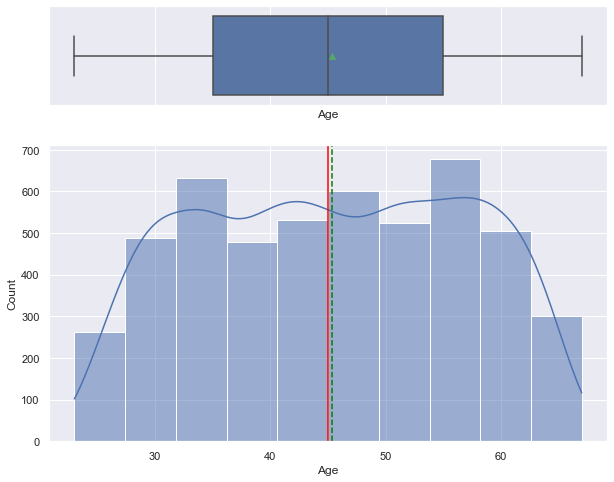

<IPython.core.display.Javascript object>

In [27]:
univariate_num_plot(df["Age"])

* Age are close to normally distributed.

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


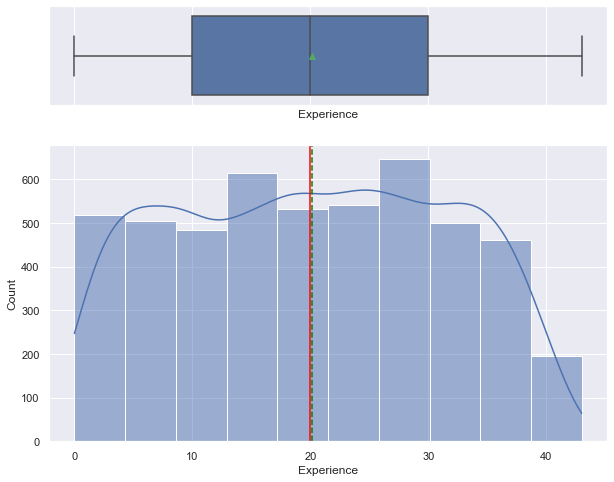

<IPython.core.display.Javascript object>

In [28]:
univariate_num_plot(df["Experience"])

* Experience are close to normally distributed.

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


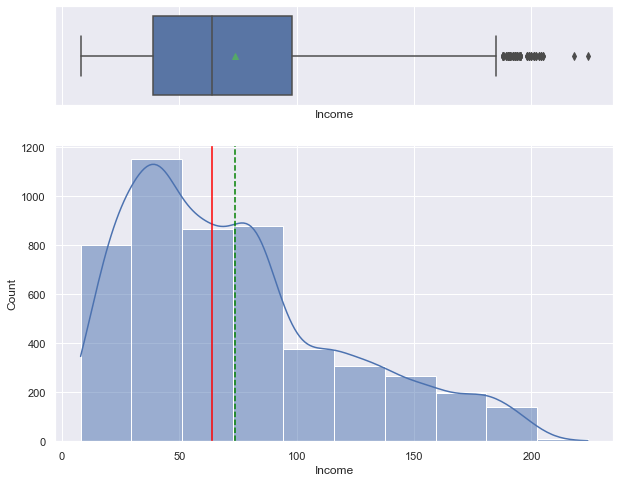

<IPython.core.display.Javascript object>

In [29]:
univariate_num_plot(df["Income"])

* The distribution is right-skewed with a median income is 64 thousands.
* It has few outliers on right side.

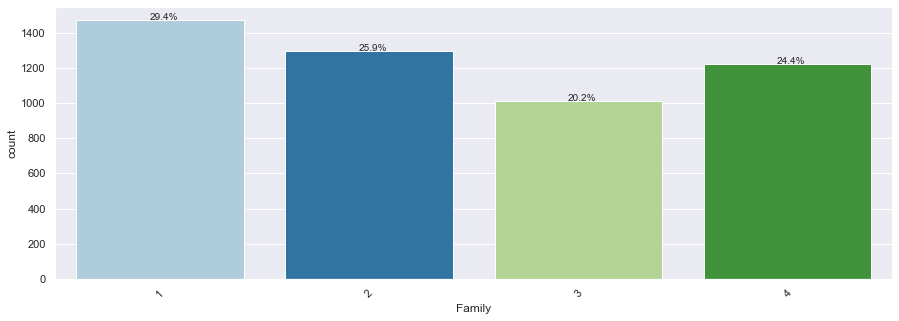

<IPython.core.display.Javascript object>

In [30]:
univariate_cat_plot(df, "Family")

* Family size are close to normally distributed. Single people has more count.

count    5000.000000
mean       23.255256
std        20.971908
min         0.000000
25%         8.400000
50%        18.000000
75%        30.000000
max       120.000000
Name: CCAvg, dtype: float64


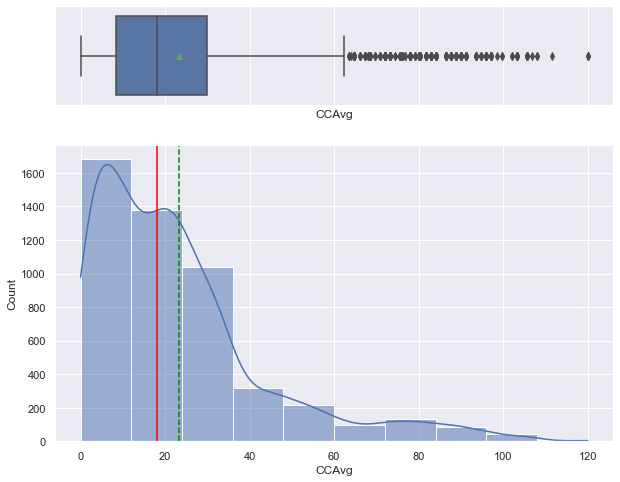

<IPython.core.display.Javascript object>

In [31]:
univariate_num_plot(df["CCAvg"])

* The distribution is right-skewed with a median CCAvg is 18 thousands per year.
* It has few outliers on right side.

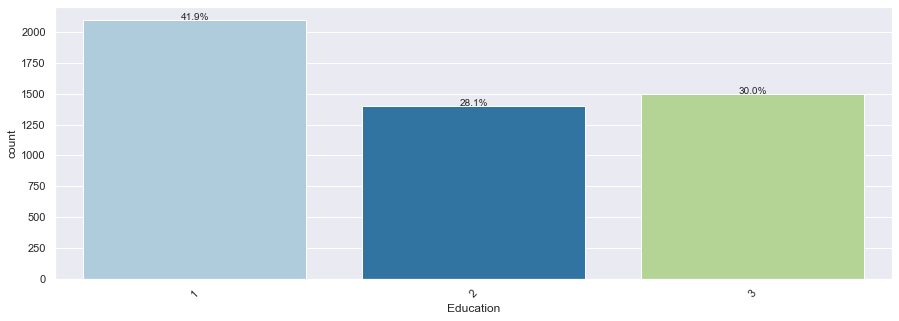

<IPython.core.display.Javascript object>

In [32]:
univariate_cat_plot(df, "Education")

* Education are close to normally distributed. Max people are 'Undergrad'.

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


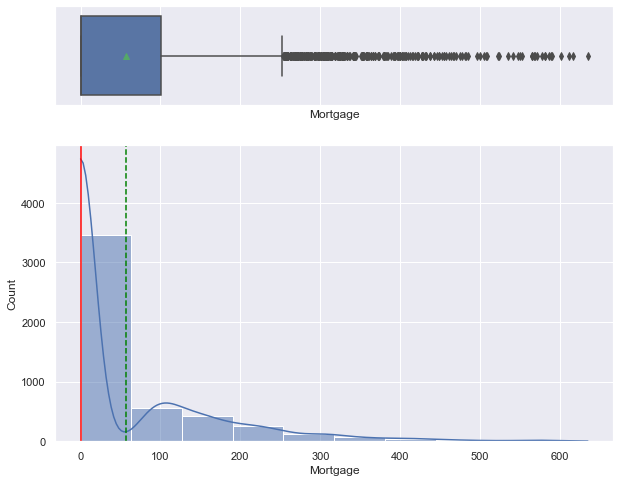

<IPython.core.display.Javascript object>

In [33]:
univariate_num_plot(df["Mortgage"])

* Mortgage is right-skewed. It has lots of outliers on the right side.

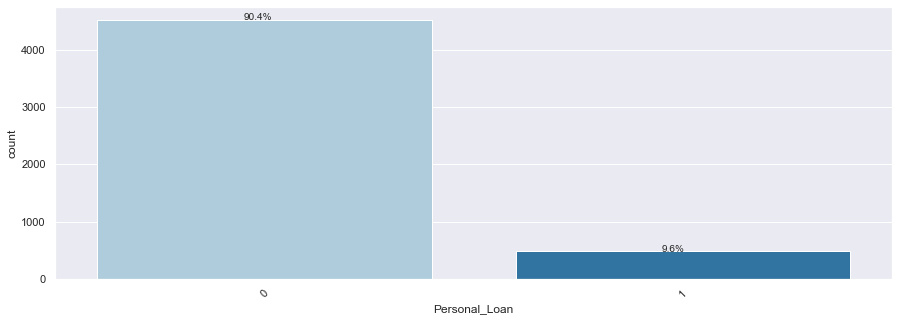

<IPython.core.display.Javascript object>

In [34]:
univariate_cat_plot(df, "Personal_Loan")

* ~90% people didn't take personal loan.

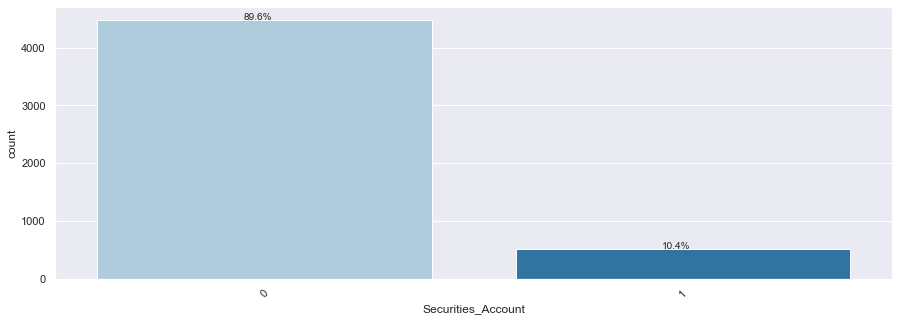

<IPython.core.display.Javascript object>

In [35]:
univariate_cat_plot(df, "Securities_Account")

* ~90% people don't have Securities Account.

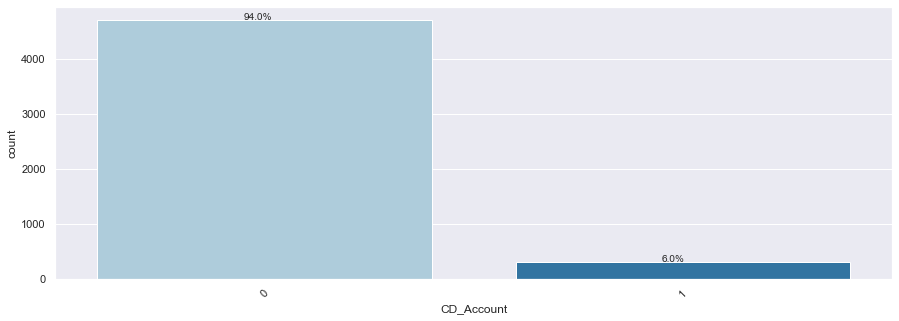

<IPython.core.display.Javascript object>

In [36]:
univariate_cat_plot(df, "CD_Account")

* 94% people don't have certificate of deposit (CD) account.

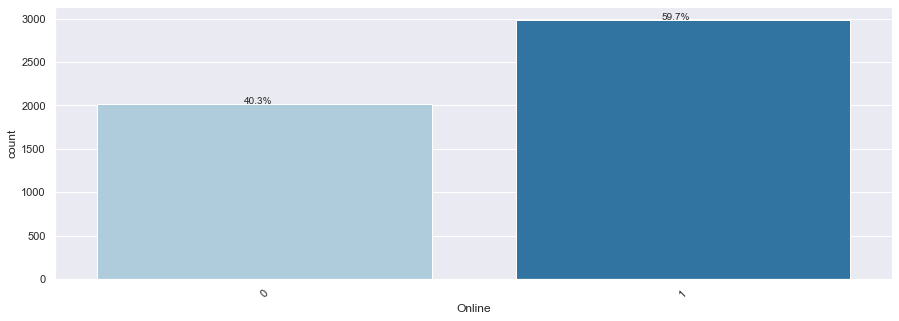

<IPython.core.display.Javascript object>

In [37]:
univariate_cat_plot(df, "Online")

* 60% people has online account.

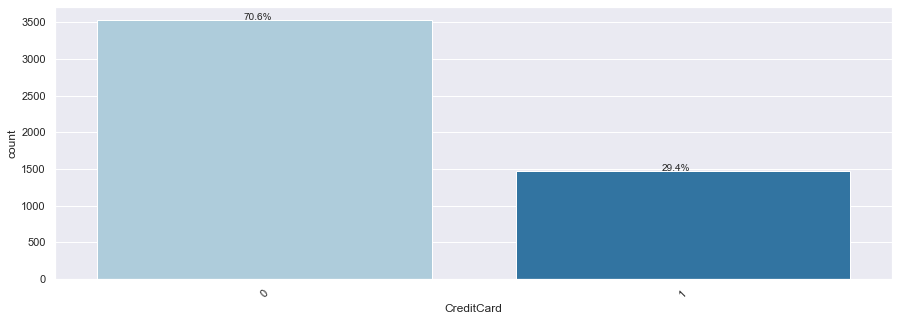

<IPython.core.display.Javascript object>

In [38]:
univariate_cat_plot(df, "CreditCard")

* ~70% people don't have Credit Card from other bank.

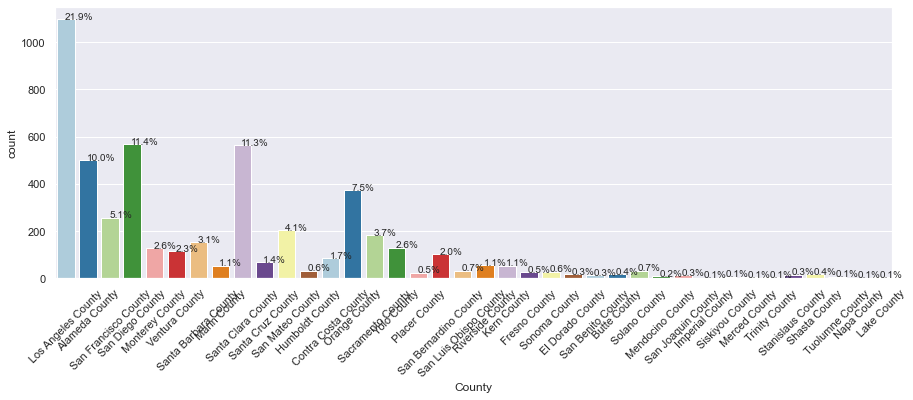

<IPython.core.display.Javascript object>

In [39]:
univariate_cat_plot(df, "County")

* ~22% people account holders are from 'Los Angeles County'
* ~11.4% people account holders are from 'San Diego County'
* ~11.3% people account holders are from 'Santa Clara County'
* Max county has less than 1% account holders.

### Bivariate Analysis

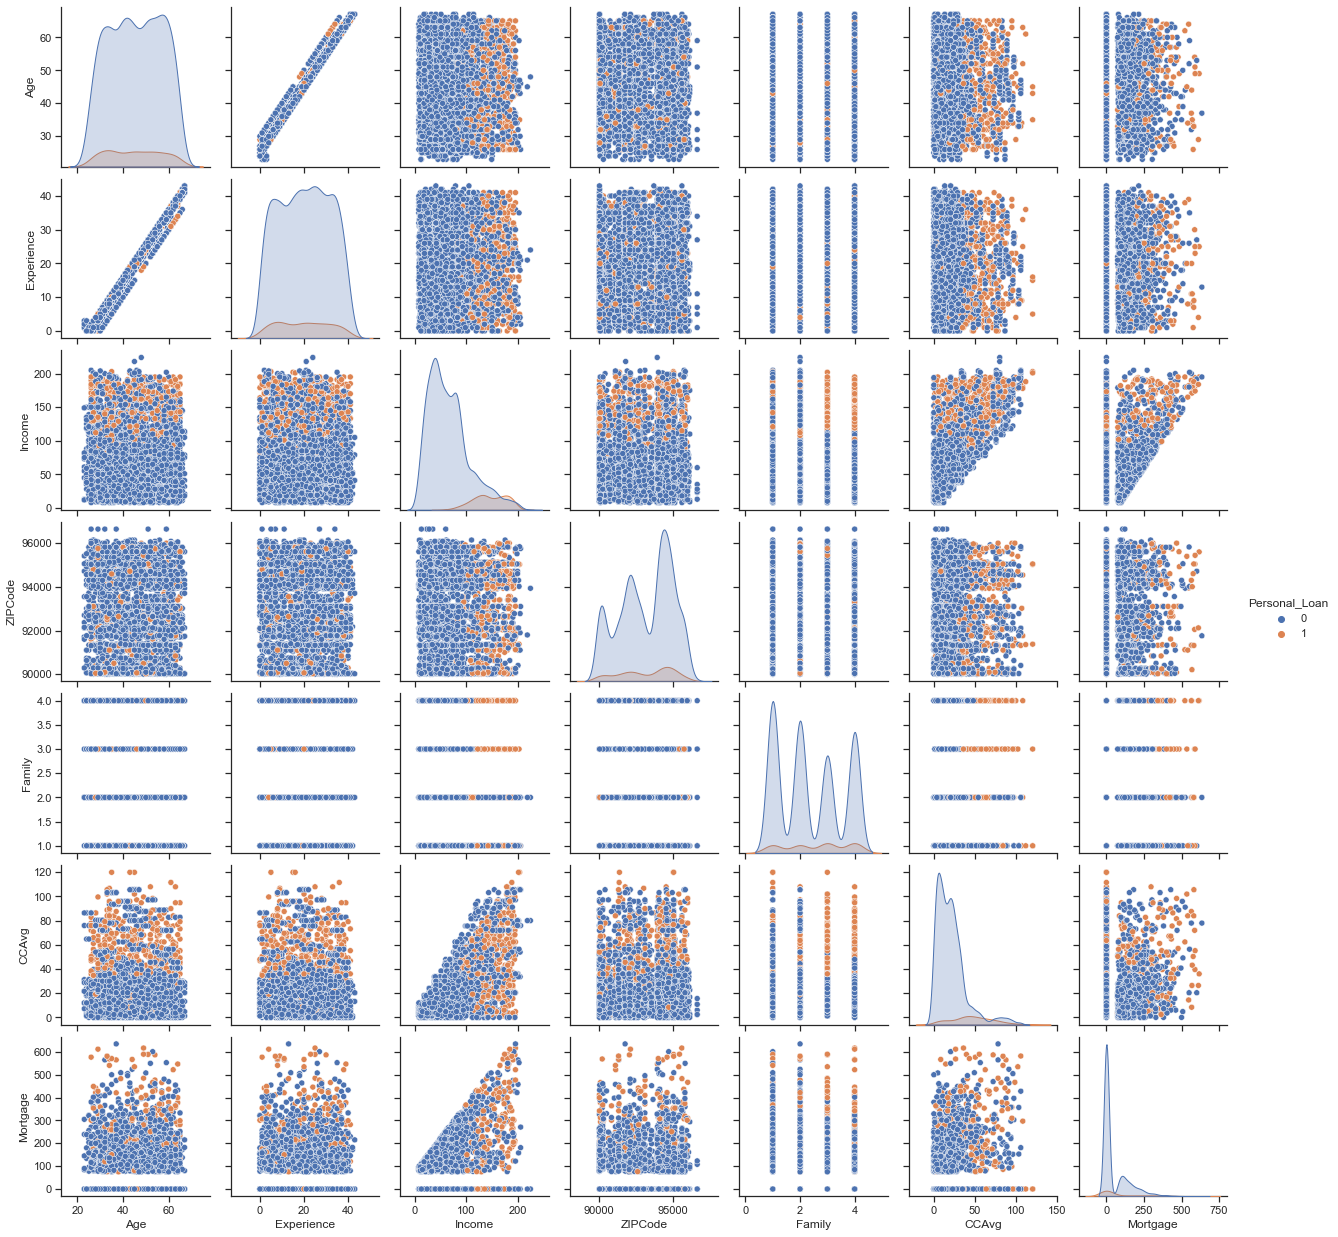

<IPython.core.display.Javascript object>

In [40]:
# using pairplot to understand the correlation of all the numerical columns.
sns.set_theme(style="ticks")
sns.pairplot(data=df, hue="Personal_Loan")

### Heat map

<AxesSubplot:>

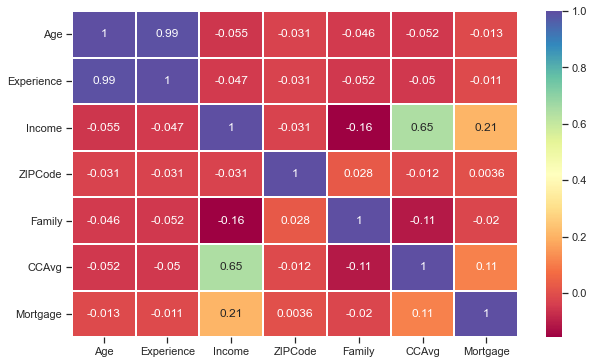

<IPython.core.display.Javascript object>

In [41]:
plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=1, cmap="Spectral")

* Age and Experience are very highly correlated(0.99) with each other.
* Income and CCAvg are also correlated with each other.

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

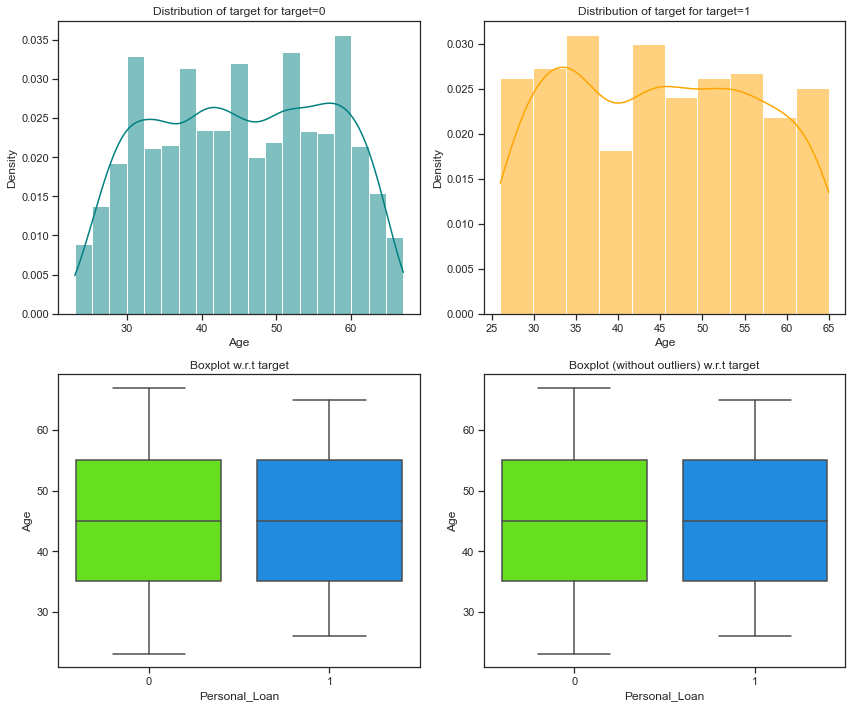

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

* Personal loan are normally distributed.

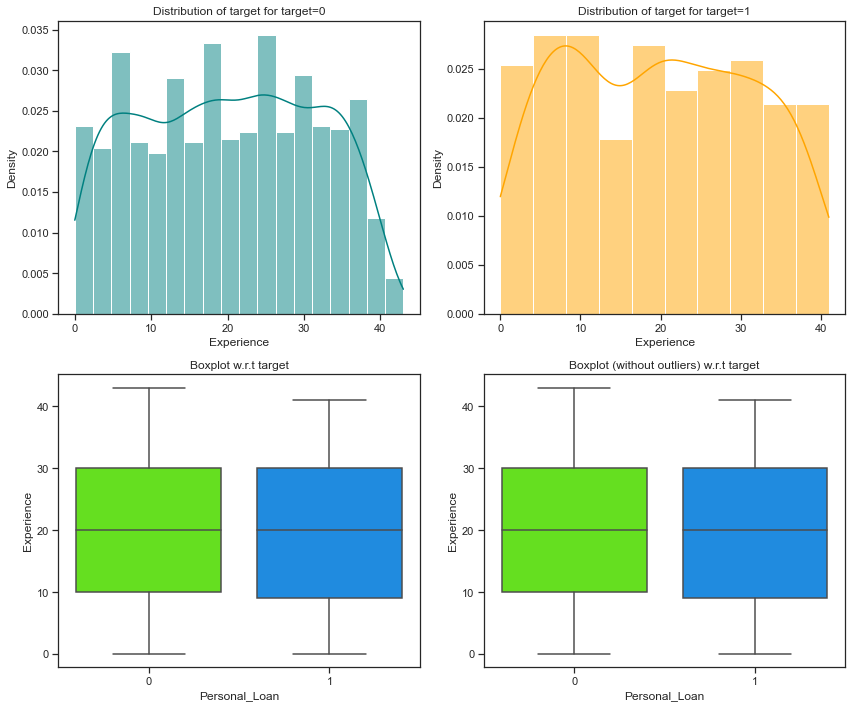

<IPython.core.display.Javascript object>

In [44]:
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

* Personal loan are normally distributed.

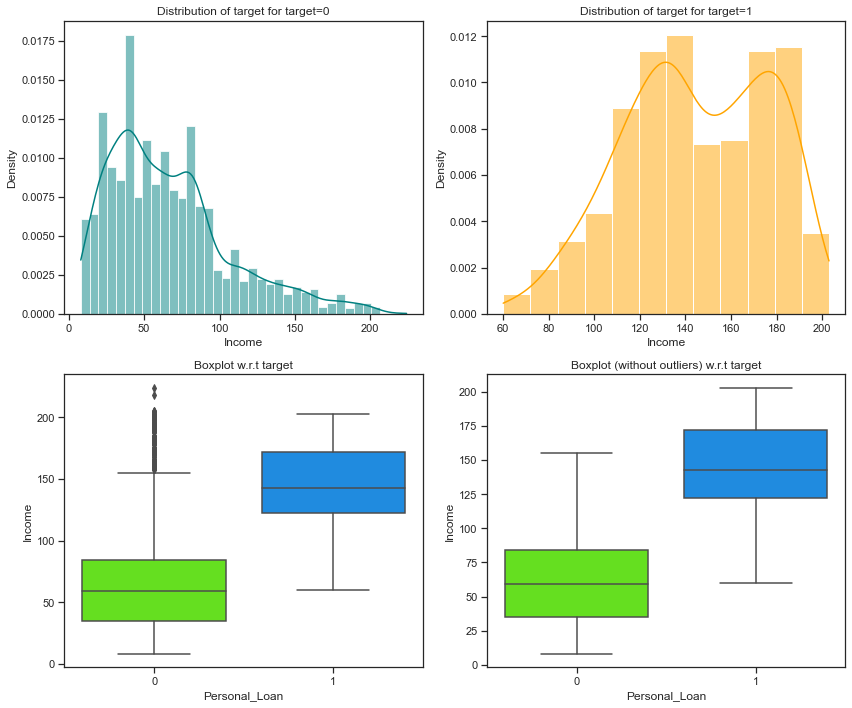

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")

* Low income people are taking less Personal loan.
* High income people are taking more Personal loan.

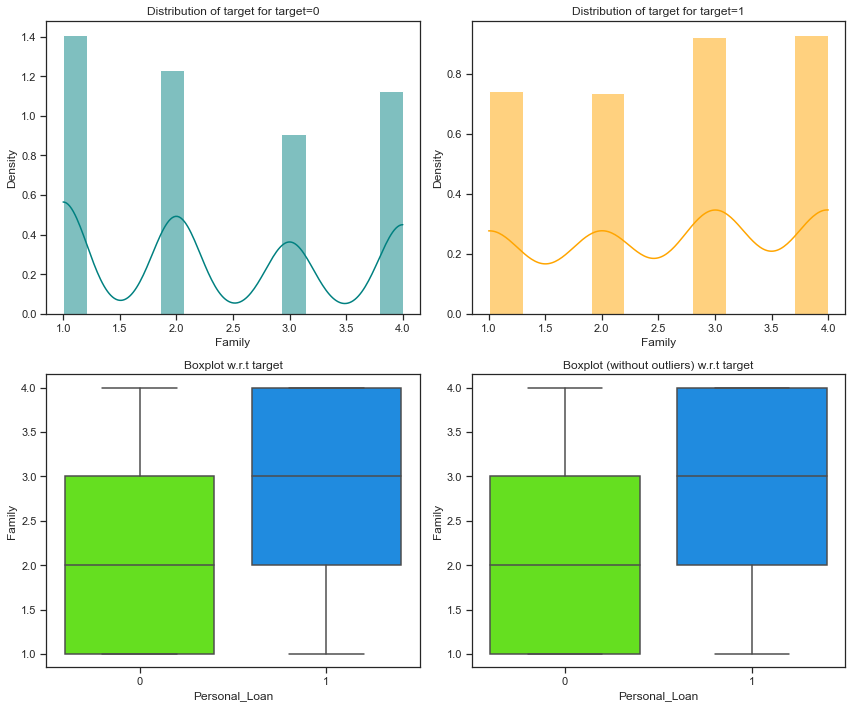

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(df, "Family", "Personal_Loan")

* Bigger size family are taking more Personal loan.

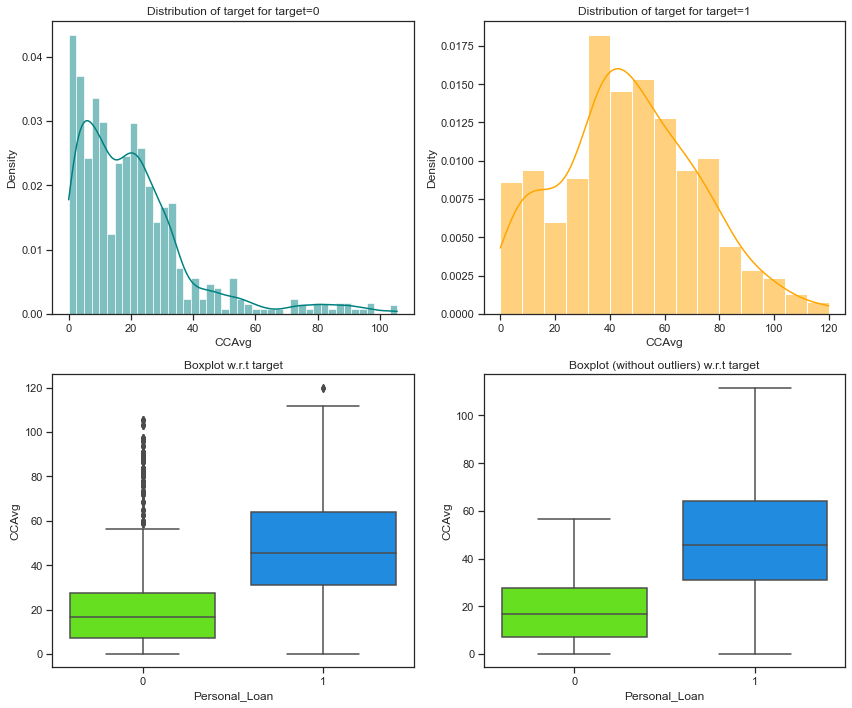

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")

* CCAvg from 35 thousands to 65 thousands are taking more Personal loan.

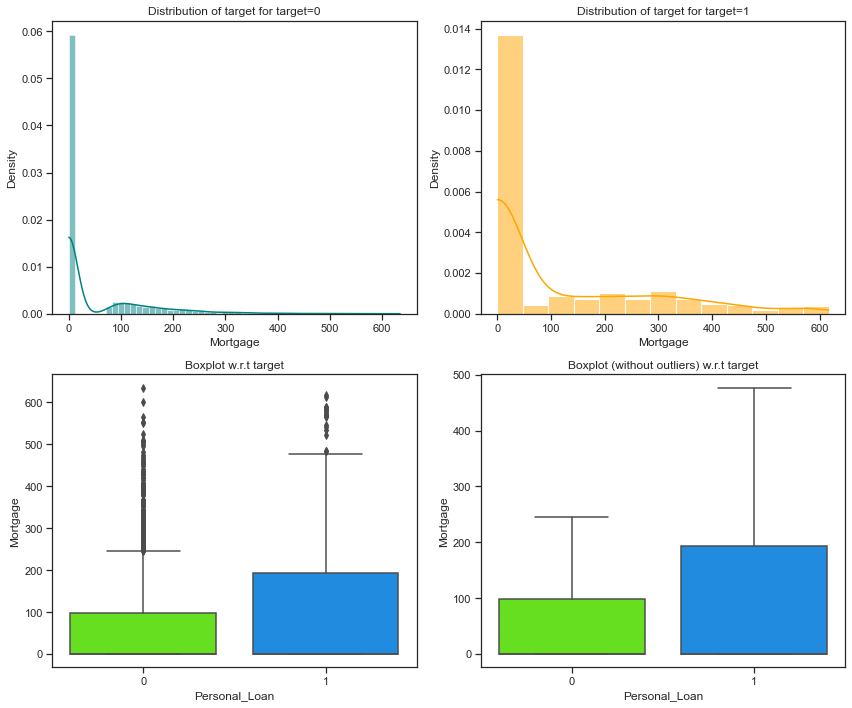

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

* Less Mortgage people taking more Personal loan.

In [49]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


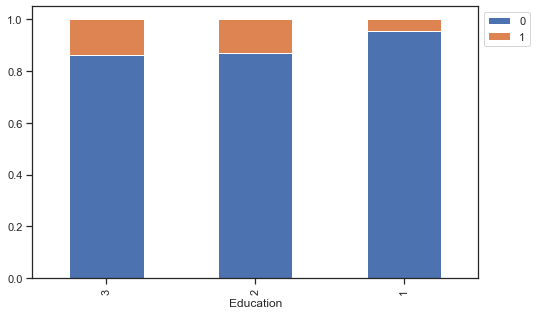

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(df, "Education", "Personal_Loan")

* More Educated people are taking more Personal loan.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


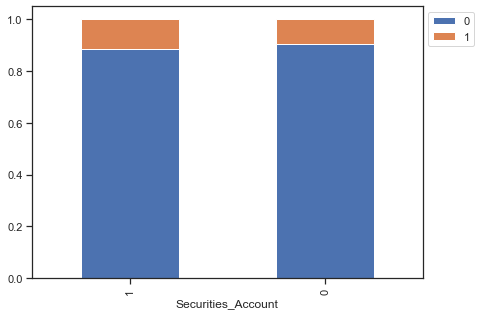

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


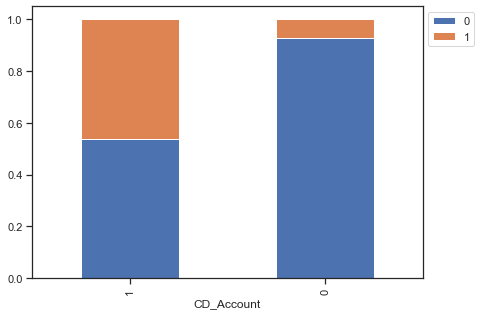

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

* Certificate of deposit (CD) account holder are taking more Personal loan.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


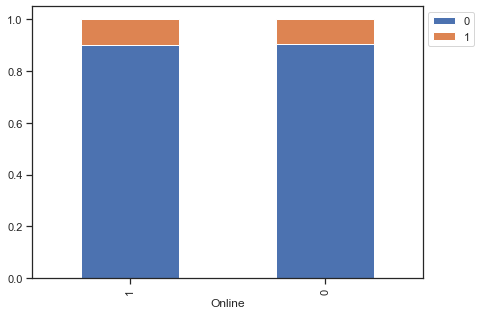

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(df, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


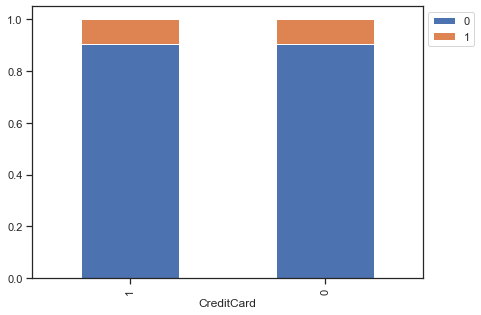

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are no duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either **int64** or **float64**.


**Observations from EDA:**

0   Age                 5000 non-null   int64   ======> this HELPS IN DETERMING THE  age limits so we can assess our programs

 1   Experience          5000 non-null   int64   ======>   this looks very similar to age and we can eventually leave it

2   Income              5000 non-null   int64   =======> income helps in determining the spending of family, our key factor

3   ZIP Code             5000 non-null   int64   =======>  This gives the family living surrounding so we can explore more

4   Family              5000 non-null   int64  ========>  size of family helps understand the outliers as well and spending

5   Crag               5000 non-null   float64 ========> this has to be average rating to help determine analysis for credit

6   Education           5000 non-null   int64    =======> typically education gives more choose to find better income

 7   Mortgage            5000 non-null   int64    =======>  this helps to ensure if further loans are needed or not

 8   Personal Loan       5000 non-null   int64   =========>   this helps in assessing if we can give one more loan

9   Securities Account  5000 non-null   int64   ==========>  this helps in assessment of loan

10  CD Account          5000 non-null   int64   ==========>   helps determine current liquidity with customer

11  Online              5000 non-null   int64   ==========>  helps target customer on multiple platforms

12  Credit Card          5000 non-null   int64  ===========>  helps get assesment if customer is credit worrthy

### Data Pre-Processing

In [55]:
df_pre = df.copy()  # copy data for preprocessing

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='County', ylabel='count'>

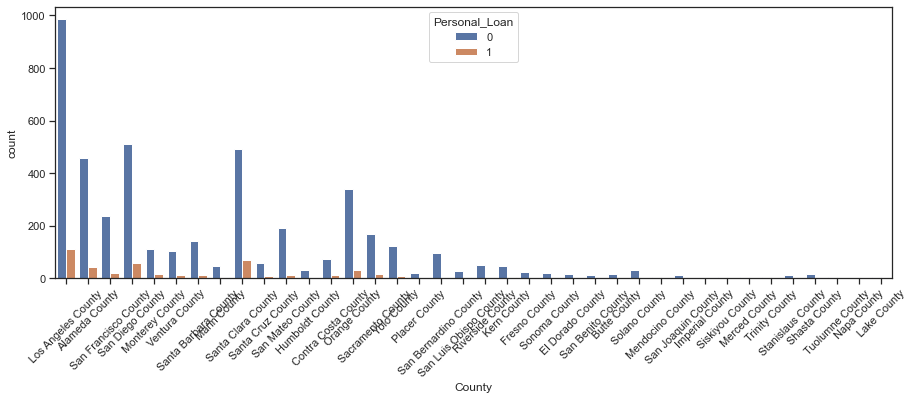

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df_pre, x="County", hue="Personal_Loan")

In [57]:
df_County = pd.DataFrame(
    df_pre.County.value_counts().loc[lambda x: x > 50]
).reset_index()
df_County.columns = [
    "County",
    "Count",
]
df_pre.loc[~df_pre.County.isin(df_County["County"]), "County"] = "Others"
# Replace County who has less than 50 account holders to 'Others'

<IPython.core.display.Javascript object>

In [58]:
df_pre.County.value_counts()  # Reduce to 19 County

Los Angeles County       1095
San Diego County          568
Santa Clara County        563
Alameda County            500
Orange County             373
Others                    312
San Francisco County      257
San Mateo County          204
Sacramento County         184
Santa Barbara County      154
Yolo County               130
Monterey County           128
Ventura County            114
San Bernardino County     101
Contra Costa County        85
Santa Cruz County          68
Riverside County           56
Kern County                54
Marin County               54
Name: County, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='County', ylabel='count'>

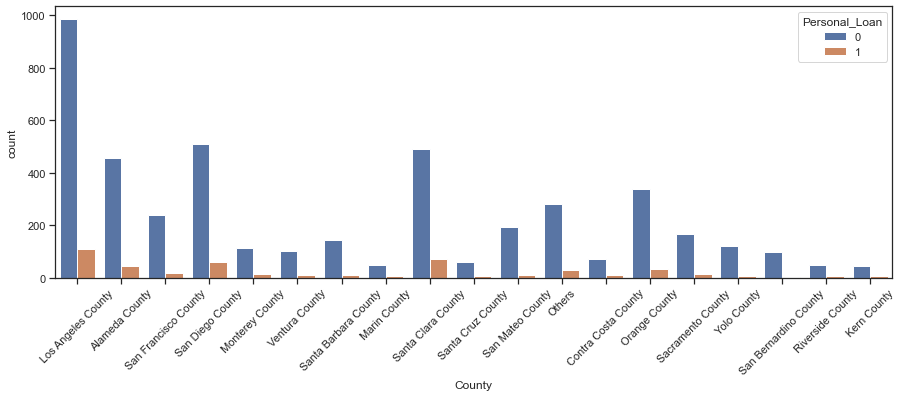

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
sns.countplot(data=df_pre, x="County", hue="Personal_Loan")

In [60]:
df_pre.drop(columns=["Experience", "ZIPCode"], inplace=True)
# Dropping 'Experience' (Highly correlated with Age) and 'ZIPCode' (already converted to 'County')

<IPython.core.display.Javascript object>

### Define dependent and independent variables

In [61]:
ind_vars = df_pre.drop(["Personal_Loan"], axis=1)
dep_var = df_pre["Personal_Loan"]

<IPython.core.display.Javascript object>

#### Adding dummy variables for category columns and Creating training and test data sets

In [62]:
ind_vars = pd.get_dummies(
    data=ind_vars, columns=["Education", "County"], drop_first=True
)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.30, random_state=6
)
print(X_train.shape, X_test.shape)

(3500, 29) (1500, 29)


<IPython.core.display.Javascript object>

In [63]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 29)
Shape of test set :  (1500, 29)
Percentage of classes in training set:
0    0.903429
1    0.096571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.905333
1    0.094667
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

In [64]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [65]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred, labels=[1, 0])
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression

In [66]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Finding the coefficients

In [67]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age    Income    Family     CCAvg  Mortgage  \
Coefficients  0.006984  0.057444  0.612403  0.010641  0.000453   

              Securities_Account  CD_Account    Online  CreditCard  \
Coefficients           -0.522945    3.329757 -0.504549   -0.892238   

              Education_2  Education_3  County_Contra Costa County  \
Coefficients     3.436707     3.561007                    0.332276   

              County_Kern County  County_Los Angeles County  \
Coefficients             0.68684                   0.230797   

              County_Marin County  County_Monterey County  \
Coefficients             0.523425                 0.37299   

              County_Orange County  County_Others  County_Riverside County  \
Coefficients              0.273643       0.088171                 0.432668   

              County_Sacramento County  County_San Bernardino County  \
Coefficients                  0.255657                     -0.358356   

              County_San Diego County  County_San Francisco County  \
Coefficients                 0.373678                     0.255951   

              County_San Mateo County  County_Santa Barbara County  \
Coefficients                 -0.94849                    -0.003869   

              County_Santa Clara County  County_Santa Cruz County  \
Coefficients                   0.668705                 -0.373053   

              County_Ventura County  County_Yolo County  Intercept  
Coefficients              -0.270512            0.095391 -12.811871

<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of Securities_Account, Online, CreditCard,'County_San Mateo County','County_Santa Cruz County','County_Ventura County', 'County_Santa Barbara County' are negative, increase in these will lead to decrease in chances of a person having Personal Loan. 
* Coefficient of CD_Account, Education_2, Education_3, Family, some levels of 'County' are  positive increase in these will lead to increase in chances of a person having Personal Loan.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [68]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age    Income     Family     CCAvg  Mortgage  \
Odds         1.007009  1.059126   1.844860  1.010698  1.000453   
Change_odd%  0.700870  5.912612  84.485988  1.069764  0.045348   

             Securities_Account   CD_Account     Online  CreditCard  \
Odds                   0.592772    27.931559   0.603778    0.409738   
Change_odd%          -40.722781  2693.155888 -39.622202  -59.026241   

             Education_2  Education_3  County_Contra Costa County  \
Odds           31.084429    35.198639                    1.394137   
Change_odd%  3008.442860  3419.863944                   39.413749   

             County_Kern County  County_Los Angeles County  \
Odds                   1.987425                   1.259603   
Change_odd%           98.742470                  25.960289   

             County_Marin County  County_Monterey County  \
Odds                    1.687799                1.452070   
Change_odd%            68.779874               45.207036   

             County_Orange County  County_Others  County_Riverside County  \
Odds                     1.314745       1.092175                 1.541364   
Change_odd%             31.474483       9.217467                54.136396   

             County_Sacramento County  County_San Bernardino County  \
Odds                         1.291309                      0.698824   
Change_odd%                 29.130914                    -30.117588   

             County_San Diego County  County_San Francisco County  \
Odds                        1.453069                     1.291690   
Change_odd%                45.306896                    29.168971   

             County_San Mateo County  County_Santa Barbara County  \
Odds                        0.387326                     0.996138   
Change_odd%               -61.267438                    -0.386183   

             County_Santa Clara County  County_Santa Cruz County  \
Odds                          1.951709                  0.688629   
Change_odd%                  95.170898                -31.137147   

             County_Ventura County  County_Yolo County  
Odds                      0.762989            1.100089  
Change_odd%             -23.701127           10.008863

<IPython.core.display.Javascript object>

#### Checking model performance on training set

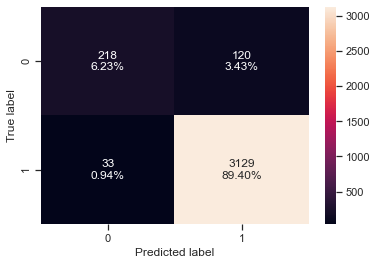

<IPython.core.display.Javascript object>

In [69]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [70]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy   Recall  Precision        F1
0  0.956286  0.64497   0.868526  0.740238

<IPython.core.display.Javascript object>

#### Checking performance on test set

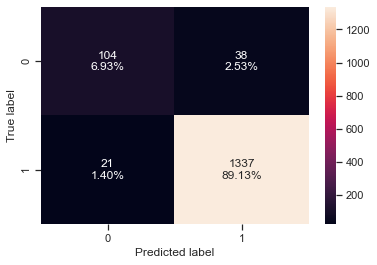

<IPython.core.display.Javascript object>

In [71]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [72]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.960667  0.732394      0.832  0.779026

<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

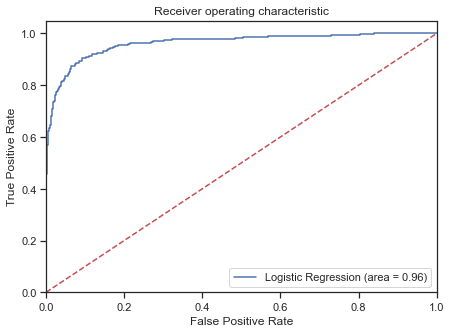

<IPython.core.display.Javascript object>

In [73]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

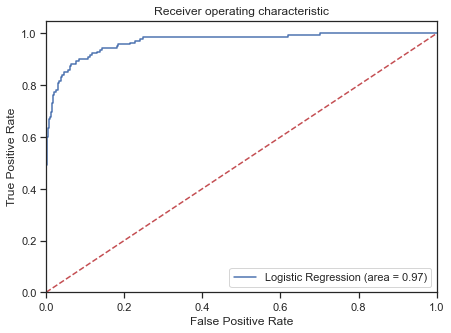

<IPython.core.display.Javascript object>

In [74]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training and test set but the recall is bad.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [75]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1159305672015501


<IPython.core.display.Javascript object>

#### Checking model performance on training set

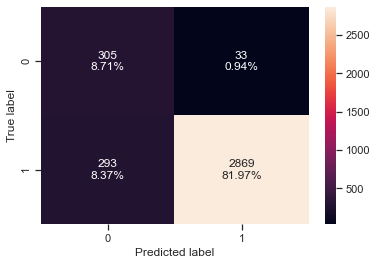

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [77]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.906857  0.902367   0.510033  0.651709

<IPython.core.display.Javascript object>

#### Checking performance on test set

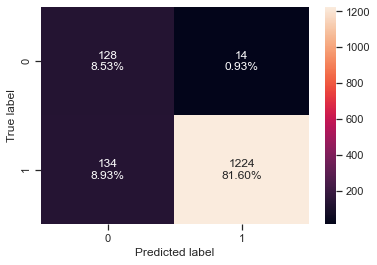

<IPython.core.display.Javascript object>

In [78]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [79]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.901333  0.901408    0.48855  0.633663

<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set of Model 2

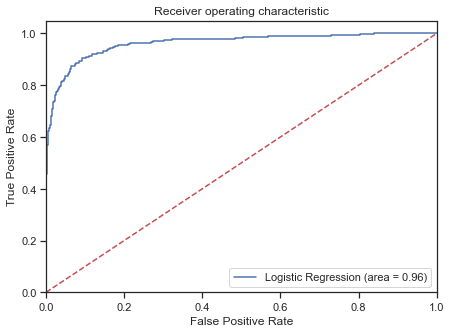

<IPython.core.display.Javascript object>

In [80]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

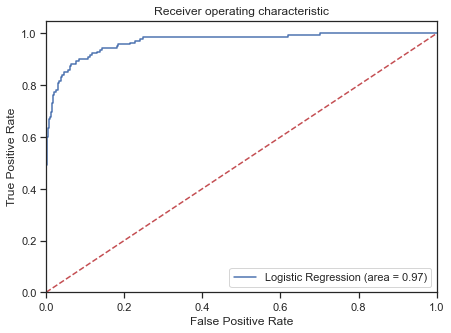

<IPython.core.display.Javascript object>

In [81]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

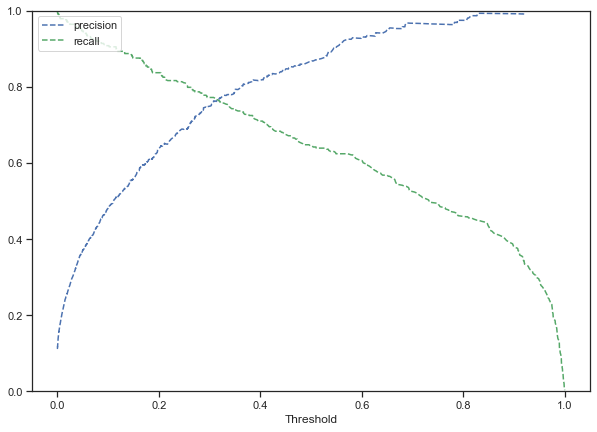

<IPython.core.display.Javascript object>

In [82]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.32, we get balanced recall and precision.

In [83]:
# setting the threshold
optimal_threshold_curve = 0.32

<IPython.core.display.Javascript object>

#### Checking model performance on training set

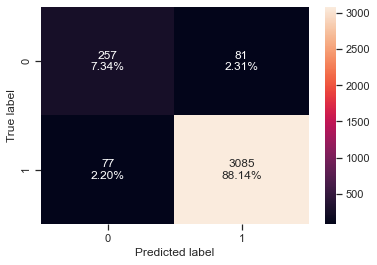

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [85]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.954857  0.760355   0.769461  0.764881

<IPython.core.display.Javascript object>

#### Checking model performance on test set

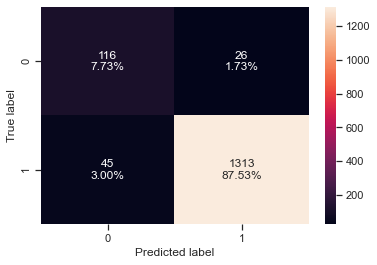

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [87]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0  0.952667  0.816901   0.720497  0.765677

<IPython.core.display.Javascript object>

### Model Performance Summary

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.11 Threshold  \
Accuracy                      0.956286                            0.906857   
Recall                        0.644970                            0.902367   
Precision                     0.868526                            0.510033   
F1                            0.740238                            0.651709   

           Logistic Regression-0.32 Threshold  
Accuracy                             0.954857  
Recall                               0.760355  
Precision                            0.769461  
F1                                   0.764881

<IPython.core.display.Javascript object>

In [89]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.11 Threshold  \
Accuracy                      0.960667                            0.901333   
Recall                        0.732394                            0.901408   
Precision                     0.832000                            0.488550   
F1                            0.779026                            0.633663   

           Logistic Regression-0.32 Threshold  
Accuracy                             0.952667  
Recall                               0.816901  
Precision                            0.720497  
F1                                   0.765677

<IPython.core.display.Javascript object>

### Sequential Feature Selector

In [90]:
# Sequential feature selector is present in mlxtend library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

In [91]:
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

<IPython.core.display.Javascript object>

In [92]:
X_train.shape

(3500, 29)

<IPython.core.display.Javascript object>

In [93]:
# we will first build model with all varaible
sfs = SFS(
    model,
    k_features=29,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.7s finished

[2021-10-09 09:27:06] Features: 1/29 -- score: 0.3788439919881763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s finished

[2021-10-09 09:27:07] Features: 2/29 -- score: 0.5005088910475651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.9s finished

[2021-10-09 09:27:08] Features: 3/29 -- score: 0.6935952389656602[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.0s finished

[2021-10-09 09:27:09] Features: 4/29 -- score: 0.70

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2021-10-09 09:27:25] Features: 29/29 -- score: 0.7168455010870328

<IPython.core.display.Javascript object>

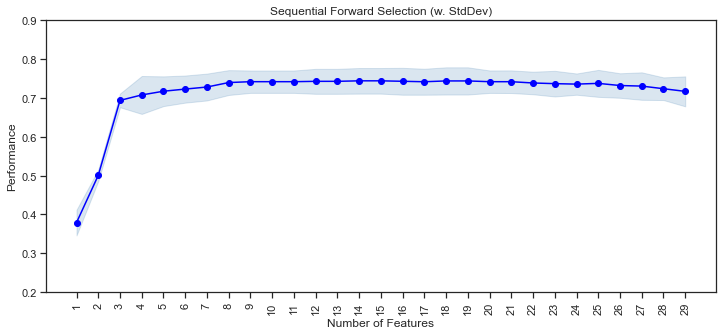

<IPython.core.display.Javascript object>

In [94]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.2, 0.9])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.3s finished

[2021-10-09 09:27:25] Features: 1/8 -- score: 0.3788439919881763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.8s finished

[2021-10-09 09:27:26] Features: 2/8 -- score: 0.5005088910475651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.8s finished

[2021-10-09 09:27:27] Features: 3/8 -- score: 0.6935952389656602[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.9s finished

[2021-10-09 09:27:28] Features: 4/8 -- score: 0.707614

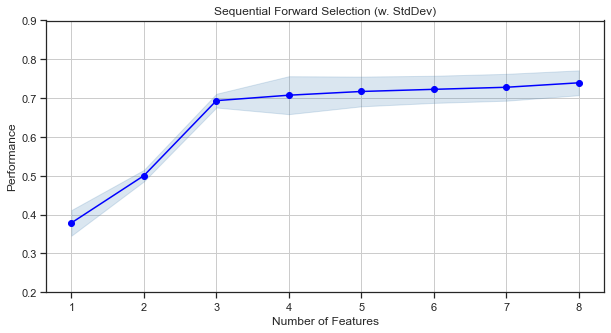

<IPython.core.display.Javascript object>

In [95]:
sfs1 = SFS(
    model,
    k_features=8,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.ylim([0.2, 0.9])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

#### Finding which features are important?

In [96]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 6, 7, 8, 9, 10, 23]


<IPython.core.display.Javascript object>

#### Let's look at best 8 variables

In [97]:
X_train.columns[feat_cols]

Index(['Income', 'Family', 'CD_Account', 'Online', 'CreditCard', 'Education_2',
       'Education_3', 'County_San Mateo County'],
      dtype='object')

<IPython.core.display.Javascript object>

In [98]:
X_train_final = X_train[X_train.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

<IPython.core.display.Javascript object>

In [99]:
# Fitting logistic regession model

logreg = LogisticRegression(
    solver="newton-cg", penalty="none", verbose=True, n_jobs=-1, random_state=0
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

<IPython.core.display.Javascript object>

### Let's Look at model performance

#### Checking model performance on training set

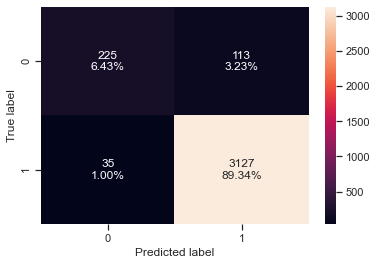

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn_with_threshold(logreg, X_train_final, y_train)

In [101]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_train_final, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


Accuracy   Recall  Precision        F1
0  0.957714  0.66568   0.865385  0.752508

<IPython.core.display.Javascript object>

#### Checking model performance on test set

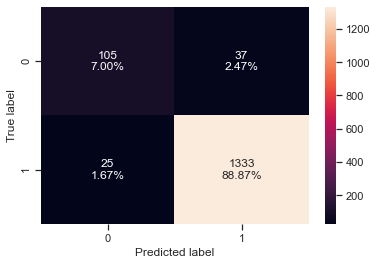

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn_with_threshold(logreg, X_test_final, y_test)

In [103]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_test_final, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0  0.958667  0.739437   0.807692  0.772059

<IPython.core.display.Javascript object>

### Model Performance Summary

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_SFS.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression - SFS",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.11 Threshold  \
Accuracy                      0.956286                            0.906857   
Recall                        0.644970                            0.902367   
Precision                     0.868526                            0.510033   
F1                            0.740238                            0.651709   

           Logistic Regression-0.32 Threshold  Logistic Regression - SFS  
Accuracy                             0.954857                   0.957714  
Recall                               0.760355                   0.665680  
Precision                            0.769461                   0.865385  
F1                                   0.764881                   0.752508

<IPython.core.display.Javascript object>

In [105]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression - SFS",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.11 Threshold  \
Accuracy                      0.960667                            0.901333   
Recall                        0.732394                            0.901408   
Precision                     0.832000                            0.488550   
F1                            0.779026                            0.633663   

           Logistic Regression-0.32 Threshold  Logistic Regression - SFS  
Accuracy                             0.952667                   0.958667  
Recall                               0.816901                   0.739437  
Precision                            0.720497                   0.807692  
F1                                   0.765677                   0.772059

<IPython.core.display.Javascript object>

### Conclusion
- We have been able to build a predictive model that can be used by the Bank to find the people who will take the Personal loan with an f1_score of 0.77 on the training set and formulate policies accordingly. 
* Coefficient of Securities_Account, Online, CreditCard,'County_San Mateo County','County_Santa Cruz County','County_Ventura County', 'County_Santa Barbara County' are negative, increase in these will lead to decrease in chances of a person having Personal Loan. 
* Coefficient of CD_Account, Education_2, Education_3, Family, some levels of 'County' are  positive increase in these will lead to increase in chances of a person having Personal Loan.

## Build Decision Tree Model

In [106]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [107]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [108]:
model_tree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)

<IPython.core.display.Javascript object>

In [109]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

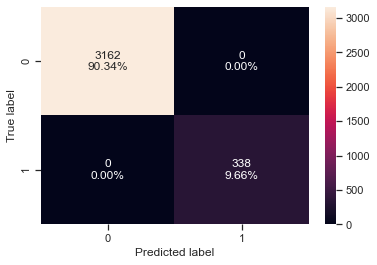

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn(model_tree, X_train, y_train)

In [111]:
decision_tree_perf_train = get_recall_score(model_tree, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

#### Checking model performance on test set

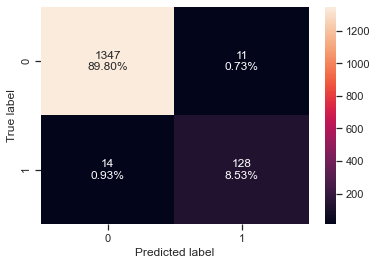

<IPython.core.display.Javascript object>

In [112]:
confusion_matrix_sklearn(model_tree, X_test, y_test)

In [113]:
decision_tree_perf_test = get_recall_score(model_tree, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.9014084507042254


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

In [114]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

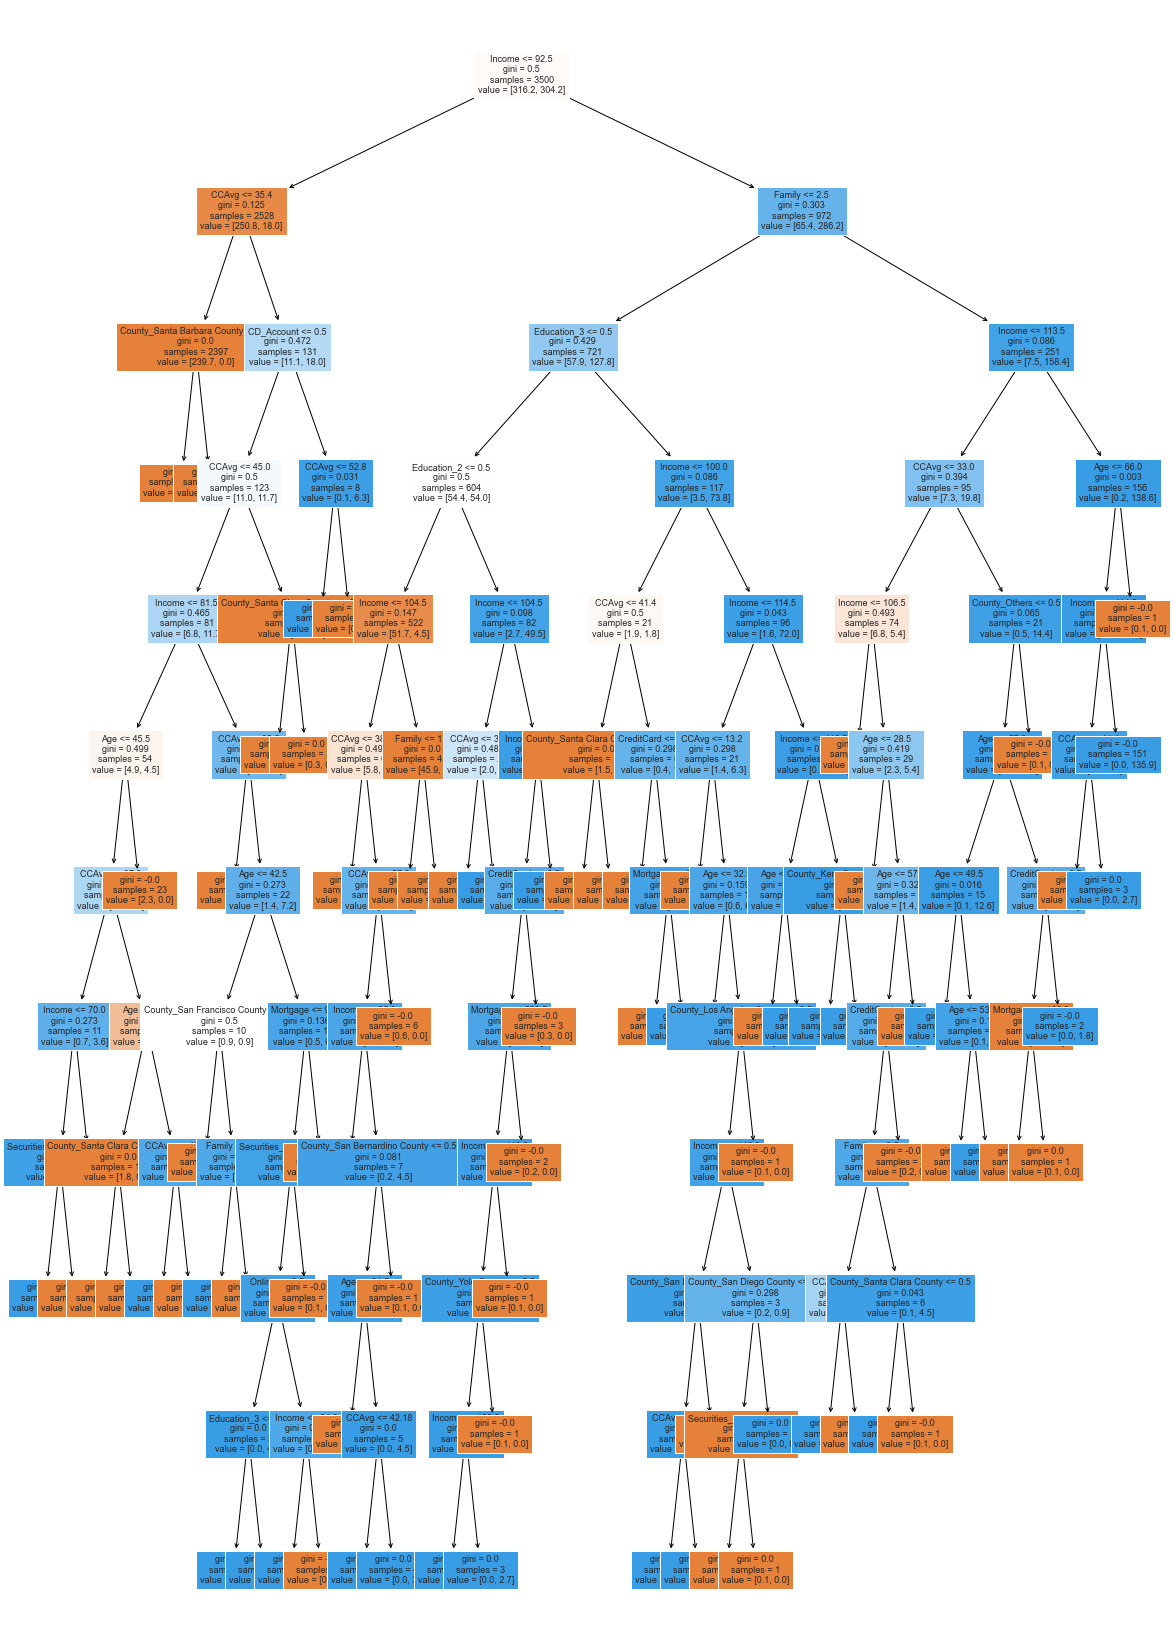

<IPython.core.display.Javascript object>

In [115]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model_tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [116]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model_tree, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 35.40
|   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |--- weights: [231.60, 0.00] class: 0
|   |   |--- County_Santa Barbara County >  0.50
|   |   |   |--- weights: [8.10, 0.00] class: 0
|   |--- CCAvg >  35.40
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 45.00
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |   |--- CCAvg <= 37.80
|   |   |   |   |   |   |   |--- Income <= 70.00
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.60] class: 1
|   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  70.00
|   |   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  37.80
|   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   

<IPython.core.display.Javascript object>

In [117]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model_tree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
Income                        5.995239e-01
Education_2                   1.315747e-01
CCAvg                         1.227869e-01
Education_3                   6.066754e-02
Family                        4.152286e-02
Age                           1.987341e-02
CD_Account                    7.081556e-03
CreditCard                    5.707327e-03
Mortgage                      2.886096e-03
County_San Francisco County   2.321952e-03
County_San Diego County       1.688692e-03
Securities_Account            1.224280e-03
County_Santa Clara County     6.309652e-04
County_Yolo County            6.309652e-04
County_Others                 6.064957e-04
County_San Bernardino County  6.041156e-04
County_Los Angeles County     5.789127e-04
Online                        8.930584e-05
County_Santa Barbara County   1.338824e-14
County_Kern County            1.353389e-16
County_Monterey County        0.000000e+00
County_Orange County          0.000000e+00
County_Rive

<IPython.core.display.Javascript object>

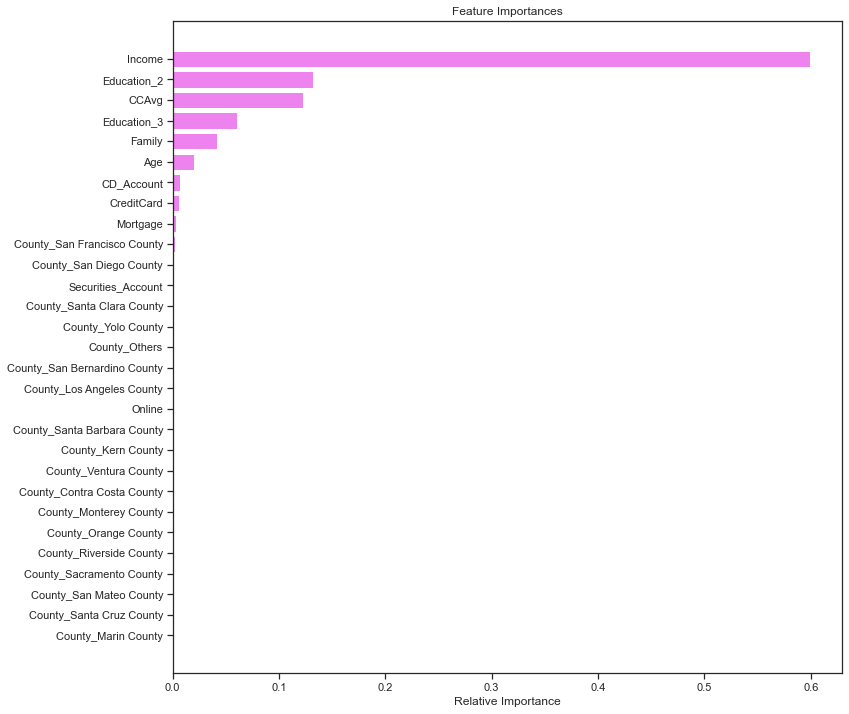

<IPython.core.display.Javascript object>

In [118]:
importances = model_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [119]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

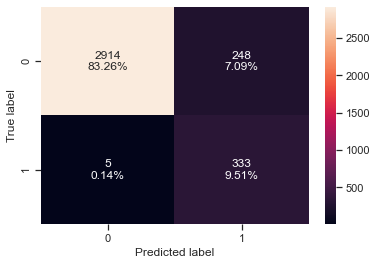

<IPython.core.display.Javascript object>

In [120]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [121]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.985207100591716


<IPython.core.display.Javascript object>

#### Checking performance on test set

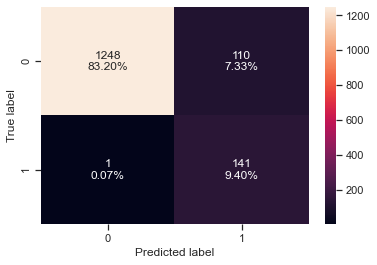

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [123]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9929577464788732


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

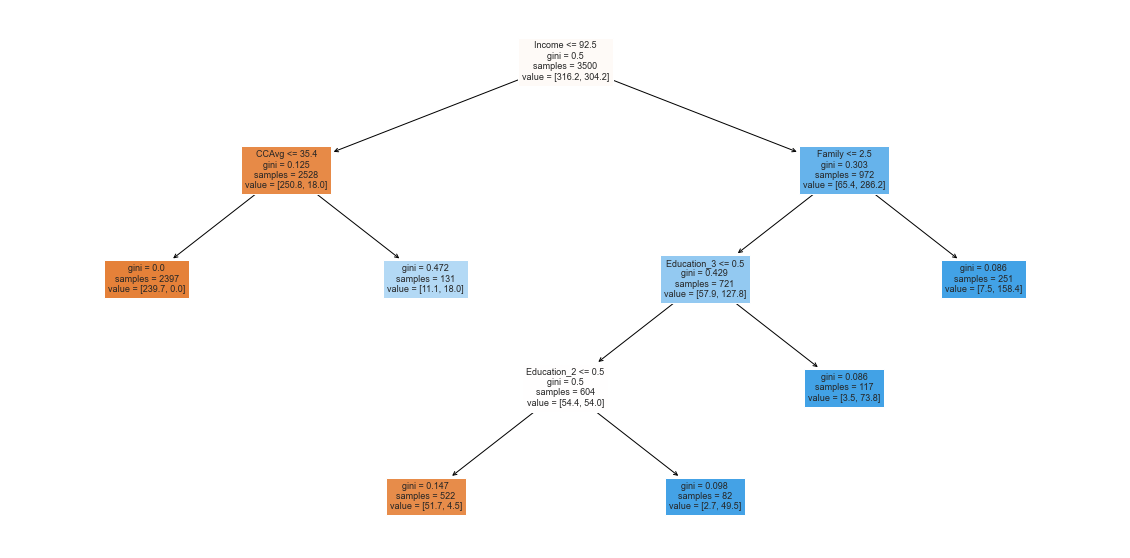

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 35.40
|   |   |--- weights: [239.70, 0.00] class: 0
|   |--- CCAvg >  35.40
|   |   |--- weights: [11.10, 18.00] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [51.70, 4.50] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.70, 49.50] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.50, 73.80] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [7.50, 158.40] class: 1



<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                   Imp
Income                        0.649079
Education_2                   0.155754
CCAvg                         0.075807
Education_3                   0.071816
Family                        0.047544
Age                           0.000000
County_Sacramento County      0.000000
County_San Bernardino County  0.000000
County_San Diego County       0.000000
County_San Francisco County   0.000000
County_San Mateo County       0.000000
County_Others                 0.000000
County_Santa Barbara County   0.000000
County_Santa Clara County     0.000000
County_Santa Cruz County      0.000000
County_Ventura County         0.000000
County_Riverside County       0.000000
County_Marin County           0.000000
County_Orange County          0.000000
County_Monterey County        0.000000
County_Los Angeles County     0.000000
County_Kern County            0.000000
County_Contra Costa County    0.000000
CreditCard                    0.000000
Online                   

<IPython.core.display.Javascript object>

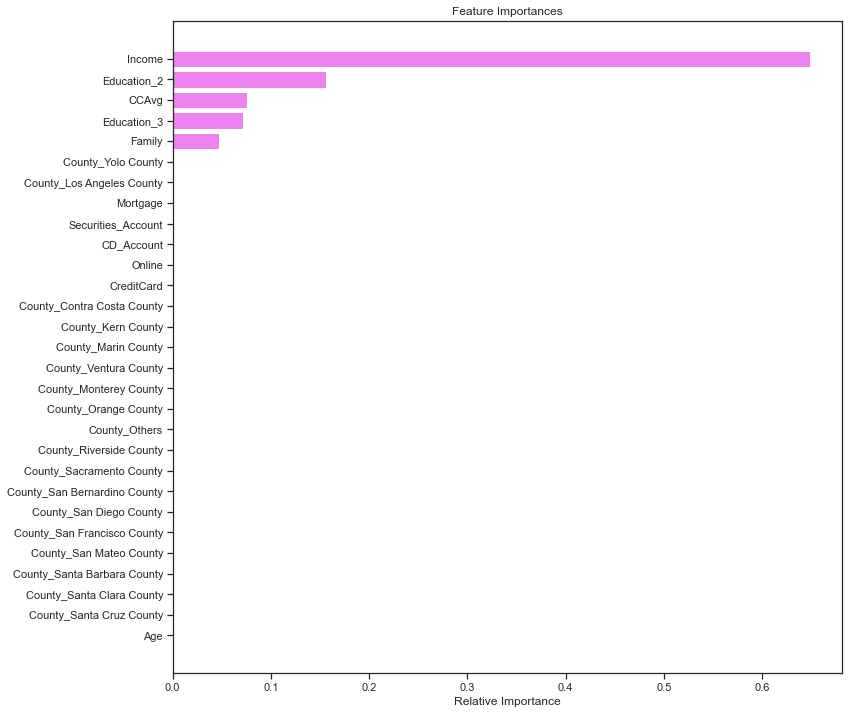

<IPython.core.display.Javascript object>

In [127]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [128]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [129]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -2.189308e-16
1   1.789528e-19 -2.187519e-16
2   3.758008e-19 -2.183761e-16
3   5.368583e-19 -2.178392e-16
4   2.415862e-18 -2.154234e-16
5   2.415862e-18 -2.130075e-16
6   2.415862e-18 -2.105916e-16
7   2.899035e-18 -2.076926e-16
8   3.543265e-18 -2.041493e-16
9   6.764415e-17 -1.365052e-16
10  1.149951e-16 -2.151012e-17
11  2.397609e-16  2.182508e-16
12  6.691617e-15  6.909868e-15
13  1.599171e-04  3.198343e-04
14  1.610701e-04  6.419745e-04
15  2.901354e-04  9.321099e-04
16  2.901354e-04  1.222245e-03
17  3.031265e-04  2.434751e-03
18  3.054057e-04  2.740157e-03
19  3.077194e-04  3.663315e-03
20  3.086547e-04  4.280625e-03
21  3.086547e-04  4.897934e-03
22  3.136599e-04  5.211594e-03
23  3.153646e-04  5.526958e-03
24  3.173356e-04  5.844294e-03
25  3.213943e-04  6.487083e-03
26  3.216761e-04  6.808759e-03
27  4.126465e-04  8.046698e-03
28  5.353480e-04  9.652742e-03
29  5.535354e-04  1.020628e-02
30  5.669168e-04  1.077319e-02
31  5.701859e-04  1.134338e-02
32  6.436150e-04  1.327423e-02
33  7.496321e-04  1.402386e-02
34  9.975141e-04  1.601889e-02
35  1.067710e-03  1.708660e-02
36  1.318501e-03  1.972360e-02
37  1.337816e-03  2.106141e-02
38  1.453368e-03  2.251478e-02
39  1.569514e-03  2.722333e-02
40  1.615804e-03  2.883913e-02
41  1.852606e-03  3.254434e-02
42  1.924731e-03  3.446907e-02
43  2.746566e-03  3.721564e-02
44  3.015249e-03  4.324614e-02
45  3.976469e-03  5.119907e-02
46  4.503059e-03  5.570213e-02
47  5.353801e-03  6.640974e-02
48  5.590218e-03  7.759017e-02
49  3.200730e-02  1.095975e-01
50  3.871982e-02  2.257569e-01
51  2.740560e-01  4.998129e-01

<IPython.core.display.Javascript object>

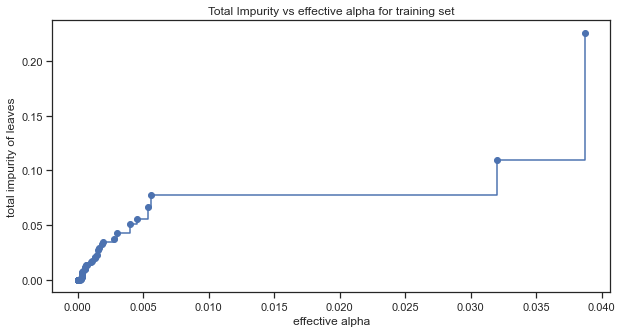

<IPython.core.display.Javascript object>

In [130]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [131]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.10, 1: 0.90}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2740560170210215


<IPython.core.display.Javascript object>

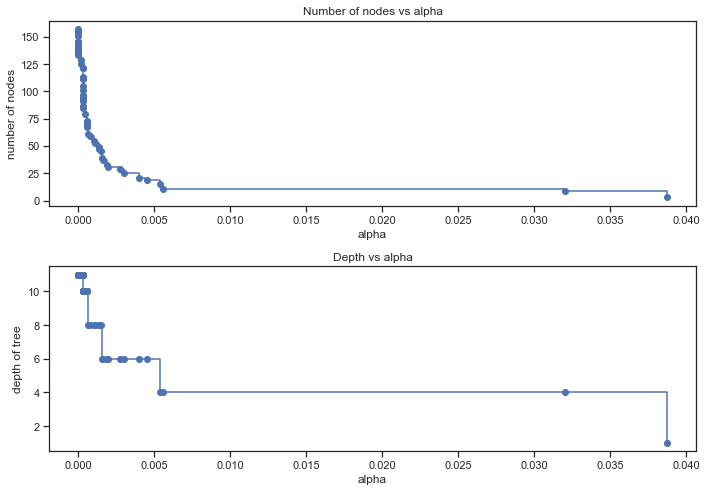

<IPython.core.display.Javascript object>

In [132]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [133]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [134]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [135]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

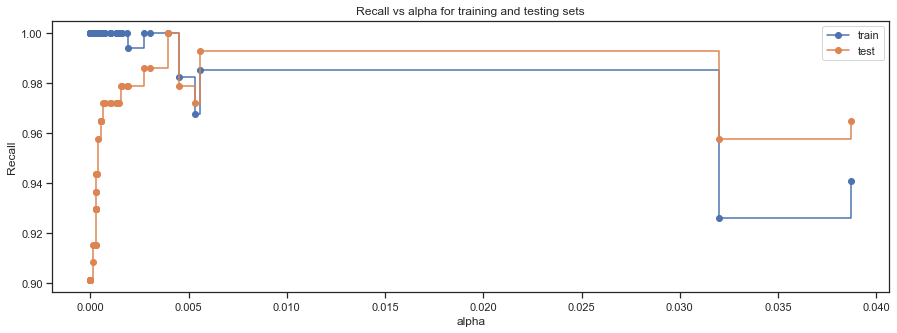

<IPython.core.display.Javascript object>

In [136]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [137]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.003976468956968184,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


<IPython.core.display.Javascript object>

In [138]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003976468956968184,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

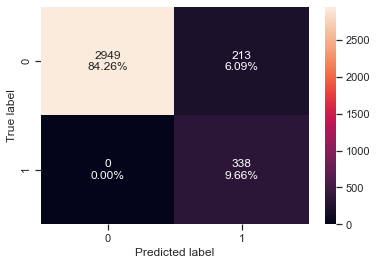

<IPython.core.display.Javascript object>

In [139]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [140]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

#### checking performance on test set

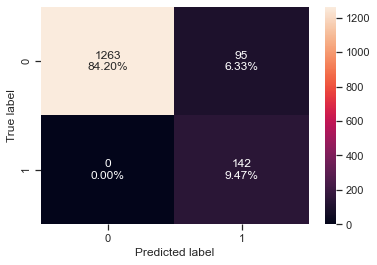

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [142]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 1.0


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

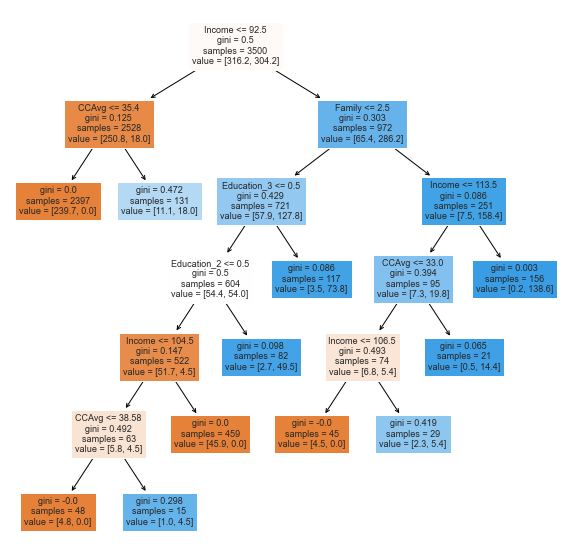

<IPython.core.display.Javascript object>

In [143]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Creating model with 0.006 ccp_alpha**

In [144]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.006, class_weight={0: 0.10, 1: 0.90}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

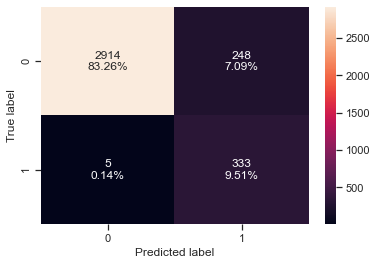

<IPython.core.display.Javascript object>

In [145]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [146]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.985207100591716


<IPython.core.display.Javascript object>

#### Checking performance on the test set

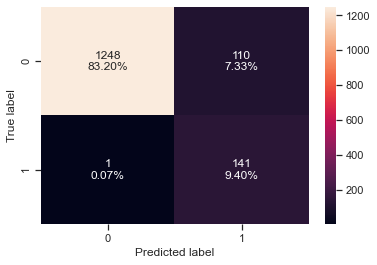

<IPython.core.display.Javascript object>

In [147]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [148]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9929577464788732


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

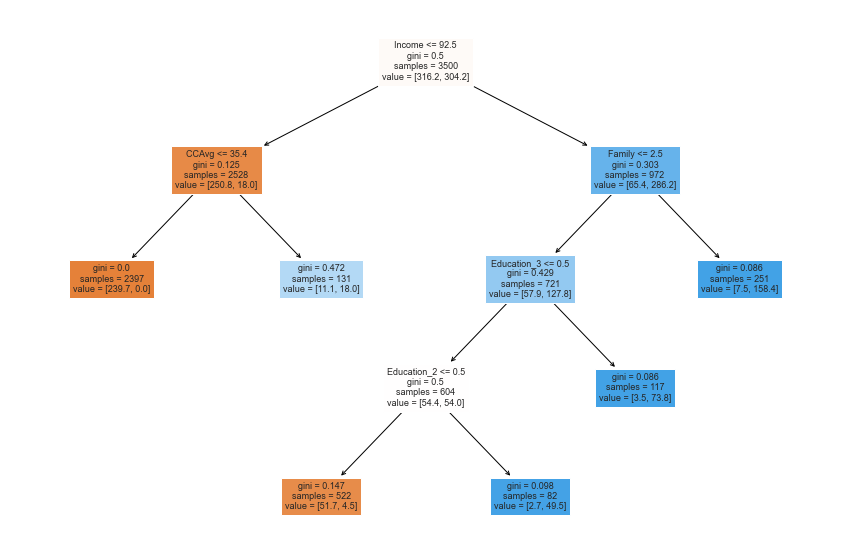

<IPython.core.display.Javascript object>

In [149]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [150]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 35.40
|   |   |--- weights: [239.70, 0.00] class: 0
|   |--- CCAvg >  35.40
|   |   |--- weights: [11.10, 18.00] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [51.70, 4.50] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.70, 49.50] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.50, 73.80] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [7.50, 158.40] class: 1



<IPython.core.display.Javascript object>

In [151]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Income                        0.649079
Education_2                   0.155754
CCAvg                         0.075807
Education_3                   0.071816
Family                        0.047544
Age                           0.000000
County_Sacramento County      0.000000
County_San Bernardino County  0.000000
County_San Diego County       0.000000
County_San Francisco County   0.000000
County_San Mateo County       0.000000
County_Others                 0.000000
County_Santa Barbara County   0.000000
County_Santa Clara County     0.000000
County_Santa Cruz County      0.000000
County_Ventura County         0.000000
County_Riverside County       0.000000
County_Marin County           0.000000
County_Orange County          0.000000
County_Monterey County        0.000000
County_Los Angeles County     0.000000
County_Kern County            0.000000
County_Contra Costa County    0.000000
CreditCard                    0.000000
Online                   

<IPython.core.display.Javascript object>

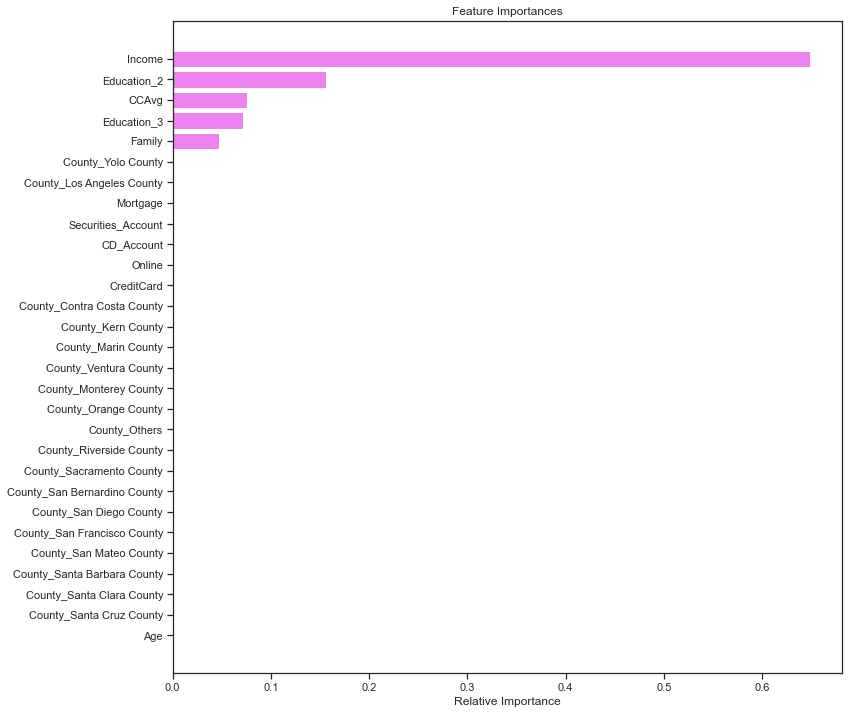

<IPython.core.display.Javascript object>

In [152]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all the decision tree models

In [153]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.985207
2                0.985207

<IPython.core.display.Javascript object>

In [154]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.901408
1               0.992958
2               0.992958

<IPython.core.display.Javascript object>

### Conclusions
- We analyzed the "Personal Loan Campaign" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to take Personal Loan or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income, Education_2, CCAvg, Education_3 and Family are the most important variable in predicting the customers that will contribute to the revenue. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* Target with higher Income people
* Target with more Educated people
* Target with bigger Family
* Target with high CCAvg
* Don't Target Securities_Account, Online, CreditCard,'County_San Mateo County','County_Santa Cruz County','County_Ventura County', 'County_Santa Barbara County' people for Personal loan has high risk